In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pds_df = pd.read_csv('pds.csv')
pds_ids = np.array(list(pds_df))
qpo_df = pd.read_csv('qpo_key.csv')

pds = np.transpose(np.array(pds_df))
freq_ids = np.array(qpo_df['observation_ID'])

frequencies = np.array(qpo_df['frequency'])

mask = np.intersect1d(pds_ids, freq_ids, return_indices=True)[1]

pds = pds[mask]
pds_ids = pds_ids[mask]

idx = np.argsort(freq_ids)

pds, pds_ids, frequencies, freq_ids = (i[idx] for i in [pds, pds_ids, frequencies, freq_ids])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(pds, frequencies, test_size=0.1)

In [25]:
def get_model(input_shape=(140,)):
    # create model
	model = Sequential()
	model.add(Dense(10, input_shape=input_shape, kernel_initializer='normal', activation='relu'))
	model.add(Dense(5, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [26]:
model = get_model()
epochs = 2000
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=epochs, batch_size=25)#, verbose=0)

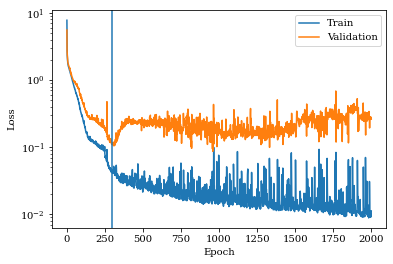

In [36]:
#Evaluate model
hist = history.history
epochs_arr = np.array(range(1, epochs+1))

train_loss = hist['loss']
val_loss = hist['val_loss']

# Make plot
fig, ax = plt.subplots()
plt.rcParams['font.family']='serif'

ax.plot(epochs_arr, train_loss, label='Train')
ax.plot(epochs_arr, val_loss, label='Validation')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()

ax.set(yscale='log')

ax.axvline(x=300)

plt.show()

In [37]:
model = get_model()
epochs = 300
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=epochs, batch_size=25)#, verbose=0)

Epoch 1/300
18/18 [==============================] - 1s 15ms/step - loss: 3.8936 - val_loss: 3.2935
Epoch 2/300
18/18 [==============================] - 0s 6ms/step - loss: 2.4316 - val_loss: 2.5732
Epoch 3/300
18/18 [==============================] - 0s 6ms/step - loss: 2.0783 - val_loss: 2.3024
Epoch 4/300
18/18 [==============================] - 0s 7ms/step - loss: 1.8728 - val_loss: 1.9701
Epoch 5/300
18/18 [==============================] - 0s 6ms/step - loss: 1.7408 - val_loss: 1.7606
Epoch 6/300
18/18 [==============================] - 0s 6ms/step - loss: 1.6294 - val_loss: 1.5864
Epoch 7/300
18/18 [==============================] - 0s 5ms/step - loss: 1.5419 - val_loss: 1.5660
Epoch 8/300
18/18 [==============================] - 0s 7ms/step - loss: 1.5089 - val_loss: 1.4616
Epoch 9/300
18/18 [==============================] - 0s 7ms/step - loss: 1.4400 - val_loss: 1.4488
Epoch 10/300
18/18 [==============================] - 0s 6ms/step - loss: 1.3969 - val_loss: 1.3348
Epoch 11

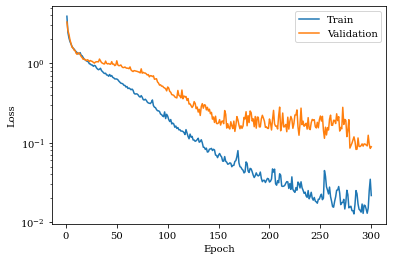

In [38]:
#Evaluate model
hist = history.history
epochs_arr = np.array(range(1, epochs+1))

train_loss = hist['loss']
val_loss = hist['val_loss']

# Make plot
fig, ax = plt.subplots()
plt.rcParams['font.family']='serif'

ax.plot(epochs_arr, train_loss, label='Train')
ax.plot(epochs_arr, val_loss, label='Validation')
ax.set(xlabel='Epoch', ylabel='Loss')
ax.legend()

ax.set(yscale='log')

plt.show()

2/2 [==============================] - 0s 4ms/step


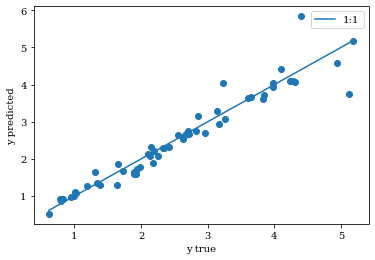

In [39]:
predictions = model.predict(X_test)
flat_y_test = y_test.flatten()
flat_y_pred = predictions.flatten()

x_line = np.linspace(min(flat_y_test), max(flat_y_test), 3)

plt.scatter(flat_y_test, flat_y_pred)
plt.plot(x_line, x_line, label='1:1')
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.legend()

plt.show()